# Урок 5. Применение математической статистики для проверки гипотез в реальной жизни для популярных метрик

### Задача 1. 

- Вы провели эксперимент c упрощением формы заказа в магазине Утконос и получили результаты по метрике конверсий в покупку.
- Выберите метод оценки и оцените есть ли статически значимые различия между конверсиями в двух группах при alpha = 5%. 
- Дайте краткие рекомендации команде .

**Результаты:** 
1) Число юзеров в группах , которые заходили на сайт в период эксперимента: n1 = 15550 и n2 = 15550 . 

2) Число юзеров в группах , которые совершили хотя бы одну покупку за период эксперимента: n1 = 164 и n2 = 228 3) Конверсии : conv1 = 1.05% conv2 = 1.47% .

### Решение задачи 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [5]:
# Число юзеров в группах , которые совершили хотя бы одну покупку за период эксперимента
successes = np.array([164, 228])

# Размер каждой группы
nobs = np.array([15550, 15550])

# Конверсии
conv = np.array([1.05, 1.47])

# Уровень значимости
alpha = 0.05

# Проведение z-теста
z_stat, p_value = proportions_ztest(successes, nobs)

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

# Проверка статистической значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия между конверсиями.")
    recommendation = "Рекомендуется рассмотреть упрощение формы заказа, так как это показало повышение конверсии."
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств статистически значимых различий между конверсиями.")
    recommendation = "Рекомендуется дополнительно исследовать влияние упрощения формы заказа, так как статистически значимое улучшение не обнаружено."

print(recommendation)

Z-statistic: -3.253054722696254
P-value: 0.001141715077067056
Отвергаем нулевую гипотезу: существуют статистически значимые различия между конверсиями.
Рекомендуется рассмотреть упрощение формы заказа, так как это показало повышение конверсии.


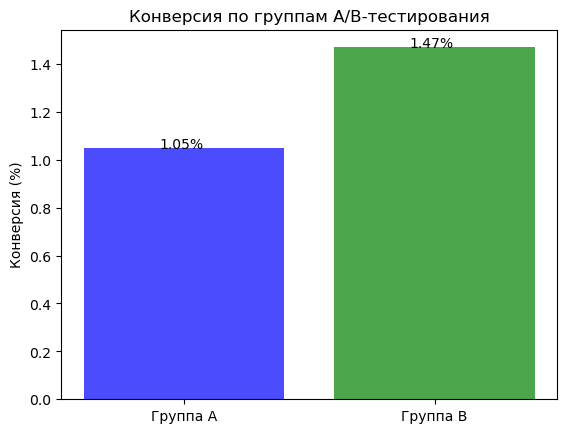

In [4]:
# Визуализация
groups = ['Группа A', 'Группа B']
y_pos = np.arange(len(groups))

plt.bar(y_pos, conv, align='center', alpha=0.7, color=['blue', 'green'])
plt.xticks(y_pos, groups)
plt.ylabel('Конверсия (%)')
plt.title('Конверсия по группам A/B-тестирования')

for i in range(len(conv)):
    plt.text(x = y_pos[i] - 0.1, y = conv[i], s = str(conv[i]) + '%', size = 10)

plt.show()

### Задача 2.
Сравниваем метрику конверсия в покупку. Размер выборки - 10000 элементов в каждой группе . Какой статистический критерий тут лучше всего подойдёт и почему ?

### Решение задачи 2.

## Статистический критерий для сравнения конверсий

При анализе результатов A/B-тестирования целью является сравнение метрики конверсии в покупку между двумя группами. При размере выборки в 10,000 элементов для каждой группы, подходящим статистическим критерием для этой задачи является **z-тест для двух пропорций** по следующим причинам:

1. **Большие выборки:** Z-тест подходит для больших выборок (N > 30), позволяя использовать центральную предельную теорему для приближения распределения выборочных пропорций к нормальному распределению.

2. **Сравнение пропорций:** Z-тест является стандартным методом для сравнения пропорций, что делает его идеальным для анализа конверсий.

3. **Независимые выборки:** В A/B-тестировании группы обычно независимы, что является одной из предпосылок z-теста.

4. **Условия применимости:** Z-тест применяется, когда количество успехов и неудач в каждой группе достаточно велико (n*p и n*(1-p) > 5 для обеих групп), где n — размер выборки, а p — вероятность успеха.

Если данные не соответствуют предположениям нормального распределения или не выполняются условия для z-теста, можно использовать альтернативные методы, такие как **точный тест Фишера** или **хи-квадрат тест**. Однако они обычно рекомендуются для меньших выборок или когда условия z-теста не соблюдаются.

Таким образом, при условии, что конверсия достаточно велика для выполнения условий применения z-теста, последний является предпочтительным вариантом для сравнения конверсий в группах с размерами выборок в 10,000 элементов.
